## Data Exploration

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#importing our cancer dataset
dataset = pd.read_csv(r'C:\Users\shiven.purohit\Desktop\breast cancer problem\cancer_dataset.csv')
X = dataset.iloc[:, 2:].values
Y = dataset.iloc[:, 1].values

In [4]:
X,Y

(array([[31, 18.02, 27.6, ..., 0.08113, 5.0, '5'],
        [61, 17.99, 10.38, ..., 0.1189, 3.0, '2'],
        [116, 21.37, 17.44, ..., 0.09067, 2.5, '0'],
        ...,
        [12, 17.17, 29.19, ..., 0.060329999999999995, 3.7, '0'],
        [3, 21.42, 22.84, ..., 0.08981, 3.0, '?'],
        [6, 16.7, 28.13, ..., 0.08036, 3.5, '0']], dtype=object),
 array(['N', 'N', 'N', 'N', 'R', 'R', 'N', 'R', 'N', 'N', 'N', 'N', 'N',
        'R', 'N', 'R', 'N', 'R', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
        'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'R', 'N', 'N', 'R', 'N',
        'R', 'R', 'N', 'R', 'R', 'N', 'N', 'R', 'N', 'R', 'N', 'R', 'N',
        'N', 'N', 'N', 'N', 'R', 'N', 'N', 'R', 'N', 'N', 'R', 'N', 'N',
        'N', 'N', 'R', 'N', 'R', 'N', 'N', 'N', 'N', 'N', 'R', 'N', 'N',
        'N', 'N', 'N', 'R', 'N', 'N', 'N', 'N', 'N', 'N', 'R', 'N', 'N',
        'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
        'N', 'R', 'N', 'N', 'N', 'R', 'R', 'N', 'R', 'N', 'R', 'N'

In [5]:
dataset.head()

ID Outcome  Time  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  119513       N    31        18.02         27.60          117.50     1013.0   
1    8423       N    61        17.99         10.38          122.80     1001.0   
2  842517       N   116        21.37         17.44          137.50     1373.0   
3  843483       N   123        11.42         20.38           77.58      386.1   
4  843584       R    27        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  ...  Worst_perimeter  \
0          0.09489            0.1036          0.1086  ...           139.70   
1          0.11840            0.2776          0.3001  ...           184.60   
2          0.08836            0.1189          0.1255  ...           159.10   
3          0.14250            0.2839          0.2414  ...            98.87   
4          0.10030            0.1328          0.1980  ...           152.20   

   Worst_area  Worst_smoothness  Worst_compactness  Worst_concavity  \
0      1436.0            0.1195             0.1926           0.3140   
1      2019.0            0.1622             0.6656           0.7119   
2      1949.0            0.1188             0.3449           0.3414   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   Worst_concave_points  Worst_symmetry  Worst_fractal_dimension  Tumor_Size  \
0                0.1170          0.2677                  0.08113         5.0   
1                0.2654          0.4601                  0.11890         3.0   
2                0.2032          0.4334                  0.09067         2.5   
3                0.2575          0.6638                  0.17300         2.0   
4                0.1625          0.2364                  0.07678         3.5   

   Lymph_Node_Status  
0                  5  
1                  2  
2                  0  
3                  0  
4                  0  

[5 rows x 35 columns]

In [6]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (198, 35)


#### We need to predict *Outcome* column 

In [7]:
dataset['Outcome'].value_counts()

N    151
R     47
Name: Outcome, dtype: int64

### feature data analysis

In [8]:
import matplotlib.pyplot as plt
import matplotlib
dataset.describe()

ID        Time  radius_mean  texture_mean  perimeter_mean  \
count  1.980000e+02  198.000000   198.000000     198.00000      198.000000   
mean   1.990469e+06   46.732323    17.412323      22.27601      114.856566   
std    2.889025e+06   34.462870     3.161676       4.29829       21.383402   
min    8.423000e+03    1.000000    10.950000      10.38000       71.900000   
25%    8.557452e+05   14.000000    15.052500      19.41250       98.160000   
50%    8.863390e+05   39.500000    17.290000      21.75000      113.700000   
75%    9.279958e+05   72.750000    19.580000      24.65500      129.650000   
max    9.411300e+06  125.000000    27.220000      39.28000      182.100000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   198.000000       198.000000        198.000000      198.000000   
mean    970.040909         0.102681          0.142648        0.156243   
std     352.149215         0.012522          0.049898        0.070572   
min     361.600000         0.074970          0.046050        0.023980   
25%     702.525000         0.093900          0.110200        0.106850   
50%     929.100000         0.101900          0.131750        0.151350   
75%    1193.500000         0.110975          0.172200        0.200500   
max    2250.000000         0.144700          0.311400        0.426800   

       concave_points_mean  ...  Worst_texture  Worst_perimeter   Worst_area  \
count           198.000000  ...     198.000000       198.000000   198.000000   
mean              0.086776  ...      30.139091       140.347778  1404.958586   
std               0.033877  ...       6.017777        28.892279   586.006972   
min               0.020310  ...      16.670000        85.100000   508.100000   
25%               0.063670  ...      26.210000       118.075000   947.275000   
50%               0.086075  ...      30.135000       136.500000  1295.000000   
75%               0.103925  ...      33.555000       159.875000  1694.250000   
max               0.201200  ...      49.540000       232.200000  3903.000000   

       Worst_smoothness  Worst_compactness  Worst_concavity  \
count        198.000000         198.000000       198.000000   
mean           0.143921           0.365102         0.436685   
std            0.022004           0.163965         0.173625   
min            0.081910           0.051310         0.023980   
25%            0.129325           0.248700         0.322150   
50%            0.141850           0.351300         0.402350   
75%            0.154875           0.423675         0.541050   
max            0.222600           1.058000         1.170000   

       Worst_concave_points  Worst_symmetry  Worst_fractal_dimension  \
count            198.000000      198.000000               198.000000   
mean               0.178778        0.323404                 0.090828   
std                0.045181        0.075161                 0.021172   
min                0.028990        0.156500                 0.055040   
25%                0.152650        0.275950                 0.076578   
50%                0.179250        0.310300                 0.086890   
75%                0.207125        0.358800                 0.101375   
max                0.290300        0.663800                 0.207500   

       Tumor_Size  
count  198.000000  
mean     2.847475  
std      1.937964  
min      0.400000  
25%      1.500000  
50%      2.500000  
75%      3.500000  
max     10.000000  

[8 rows x 33 columns]

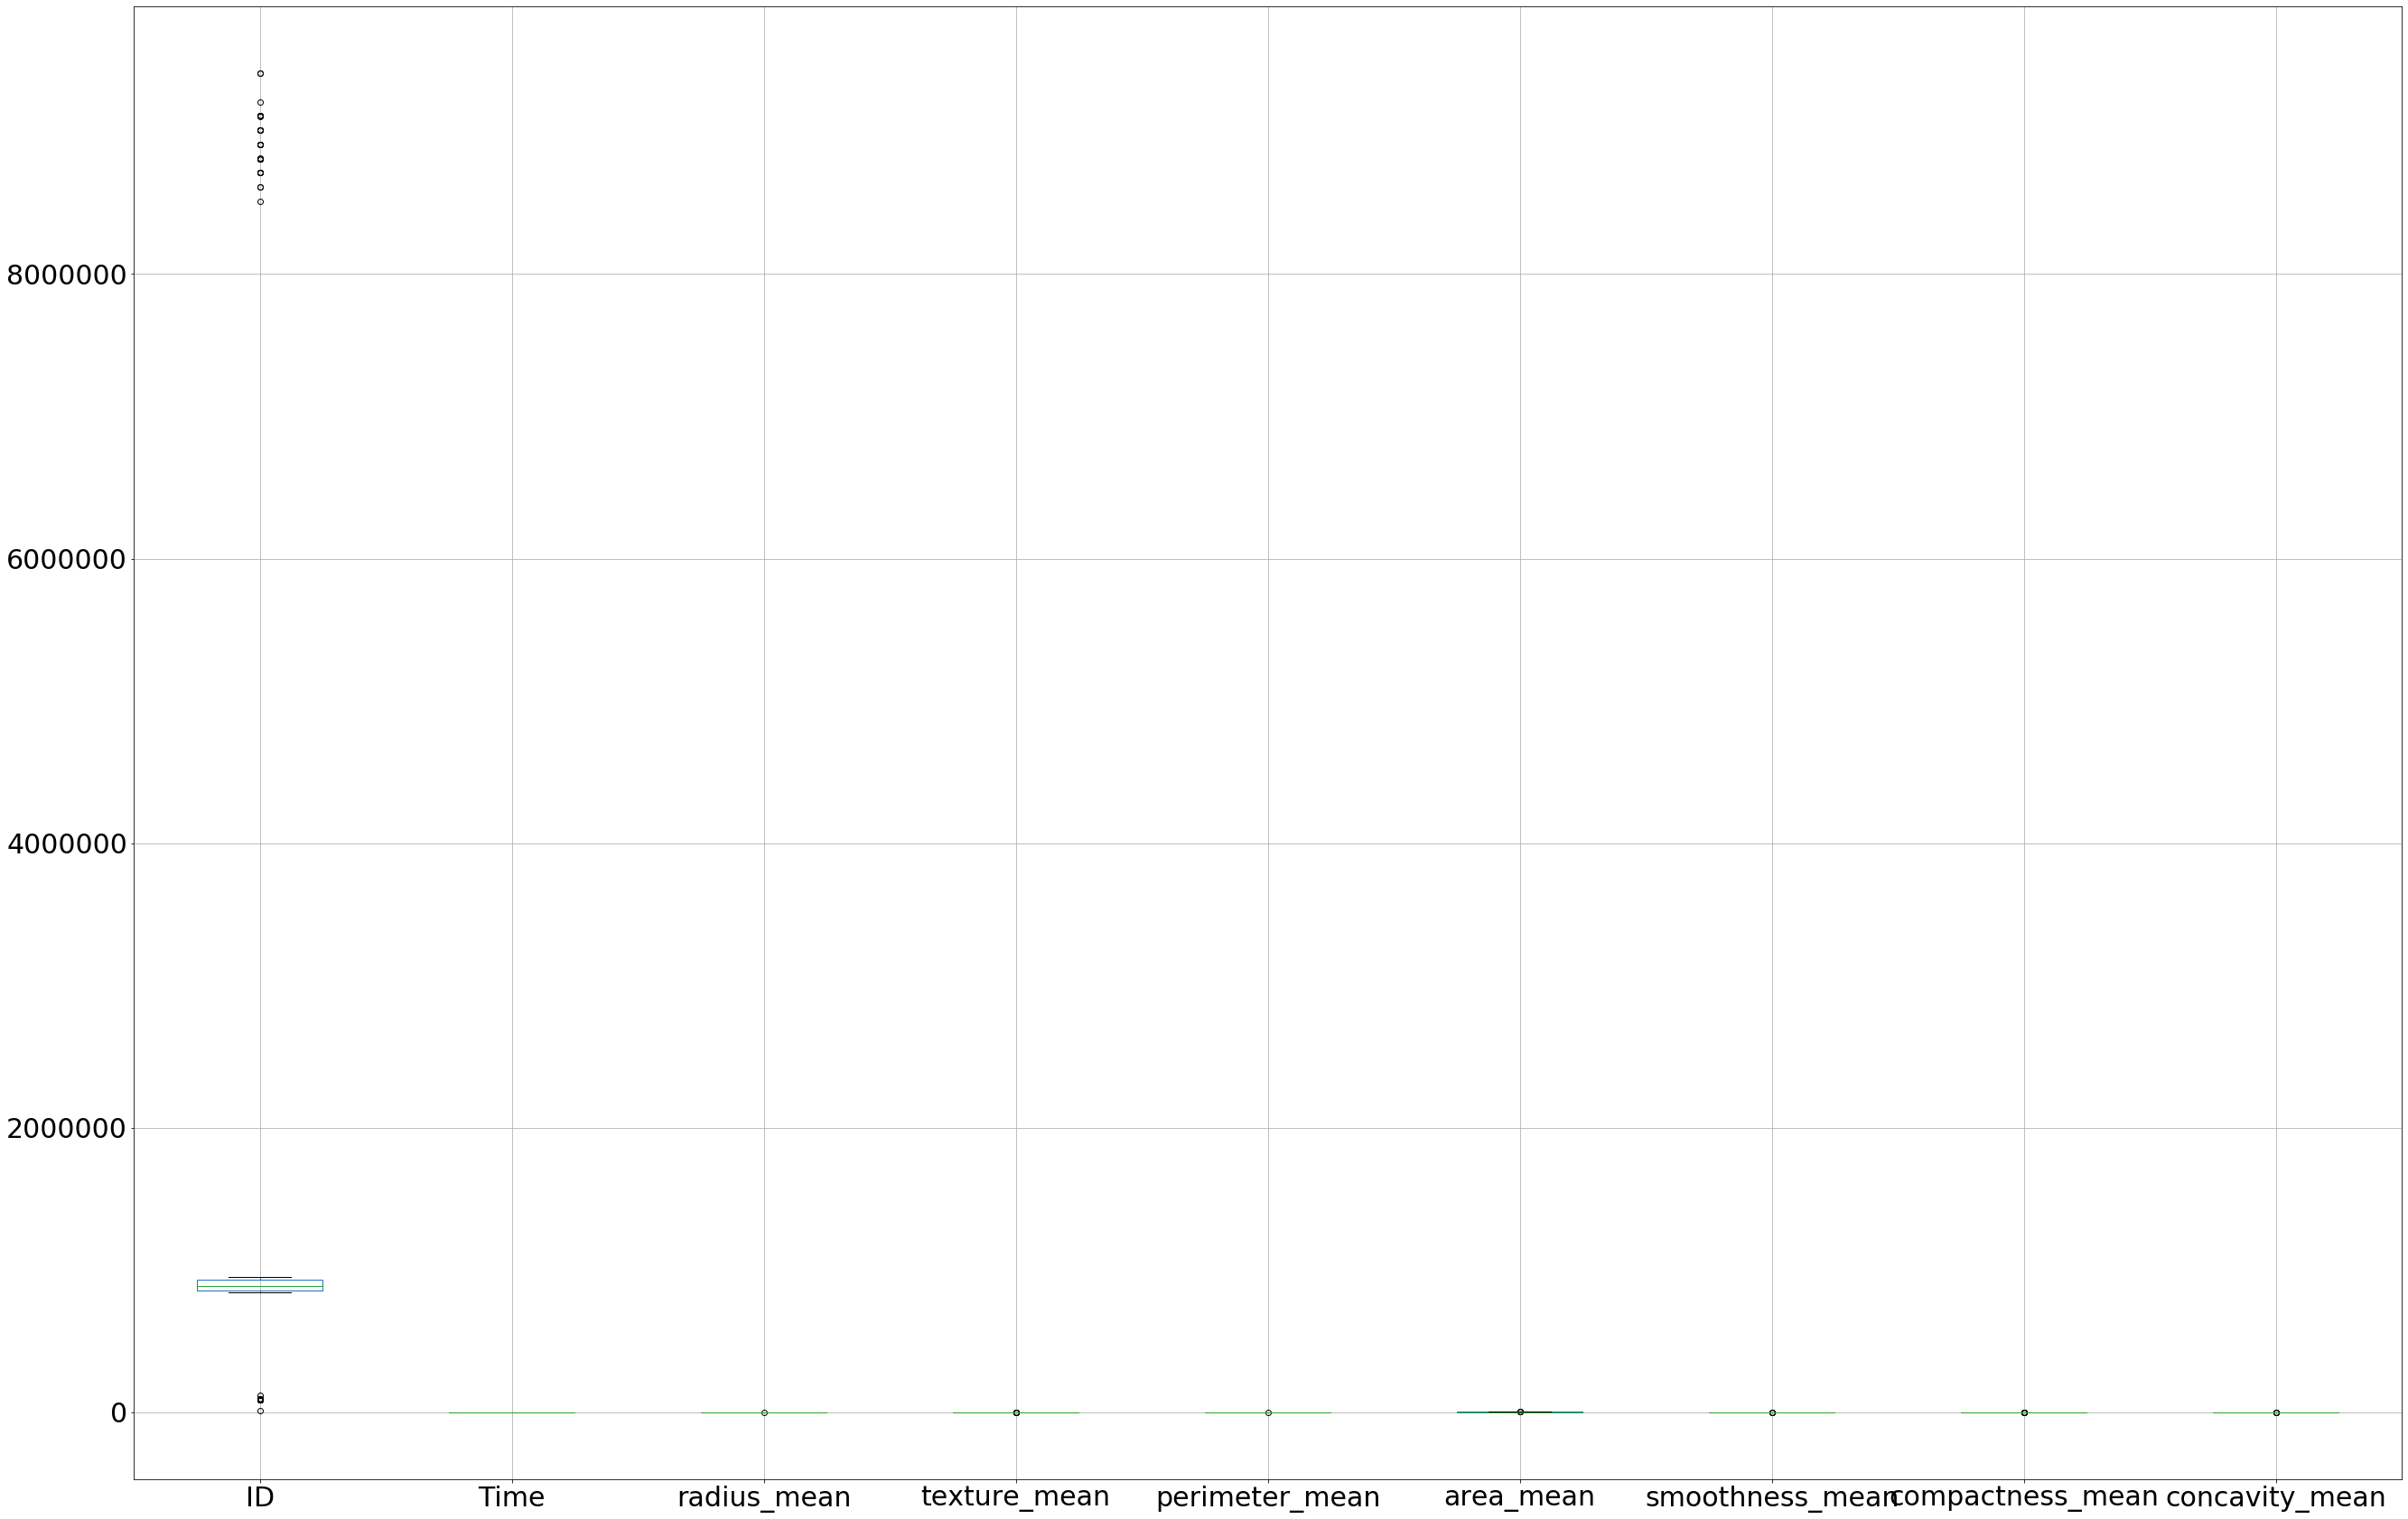

In [9]:
params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)
dataset.iloc[:, :10].boxplot(fontsize = 30, figsize=(45,30))

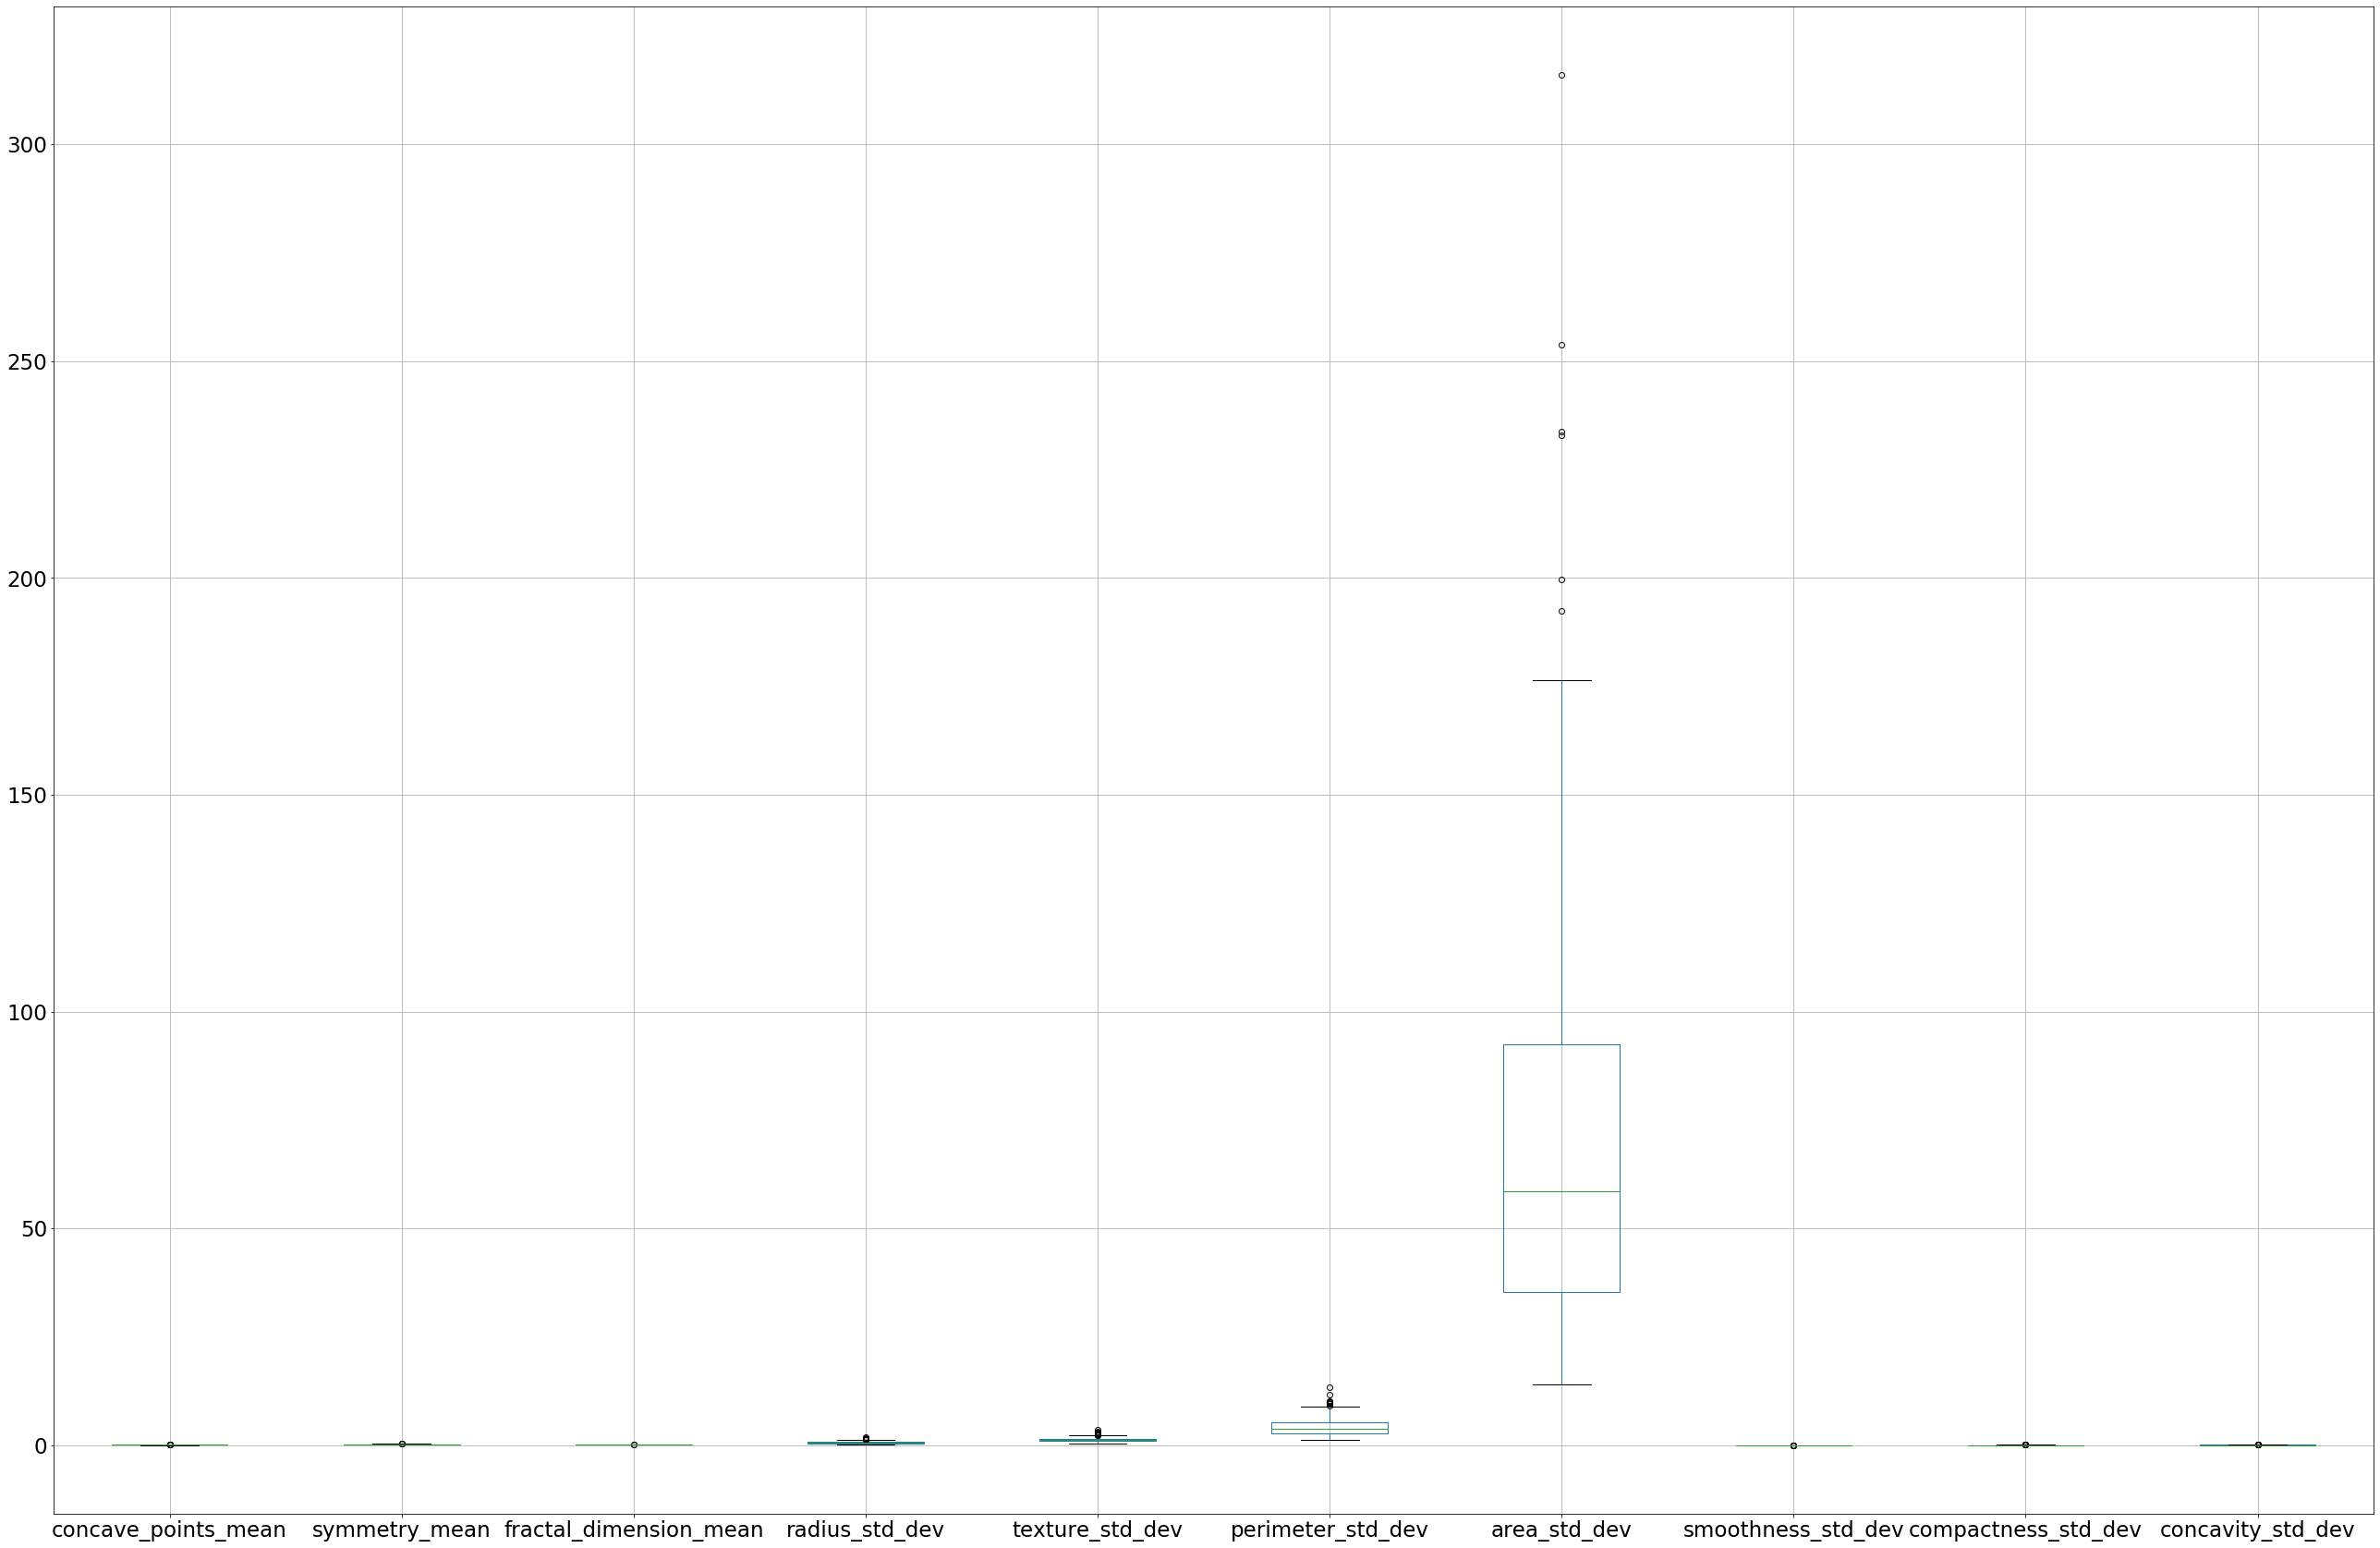

In [10]:
params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)
dataset.iloc[:, 10:20].boxplot(fontsize = 23, figsize=(45,30))

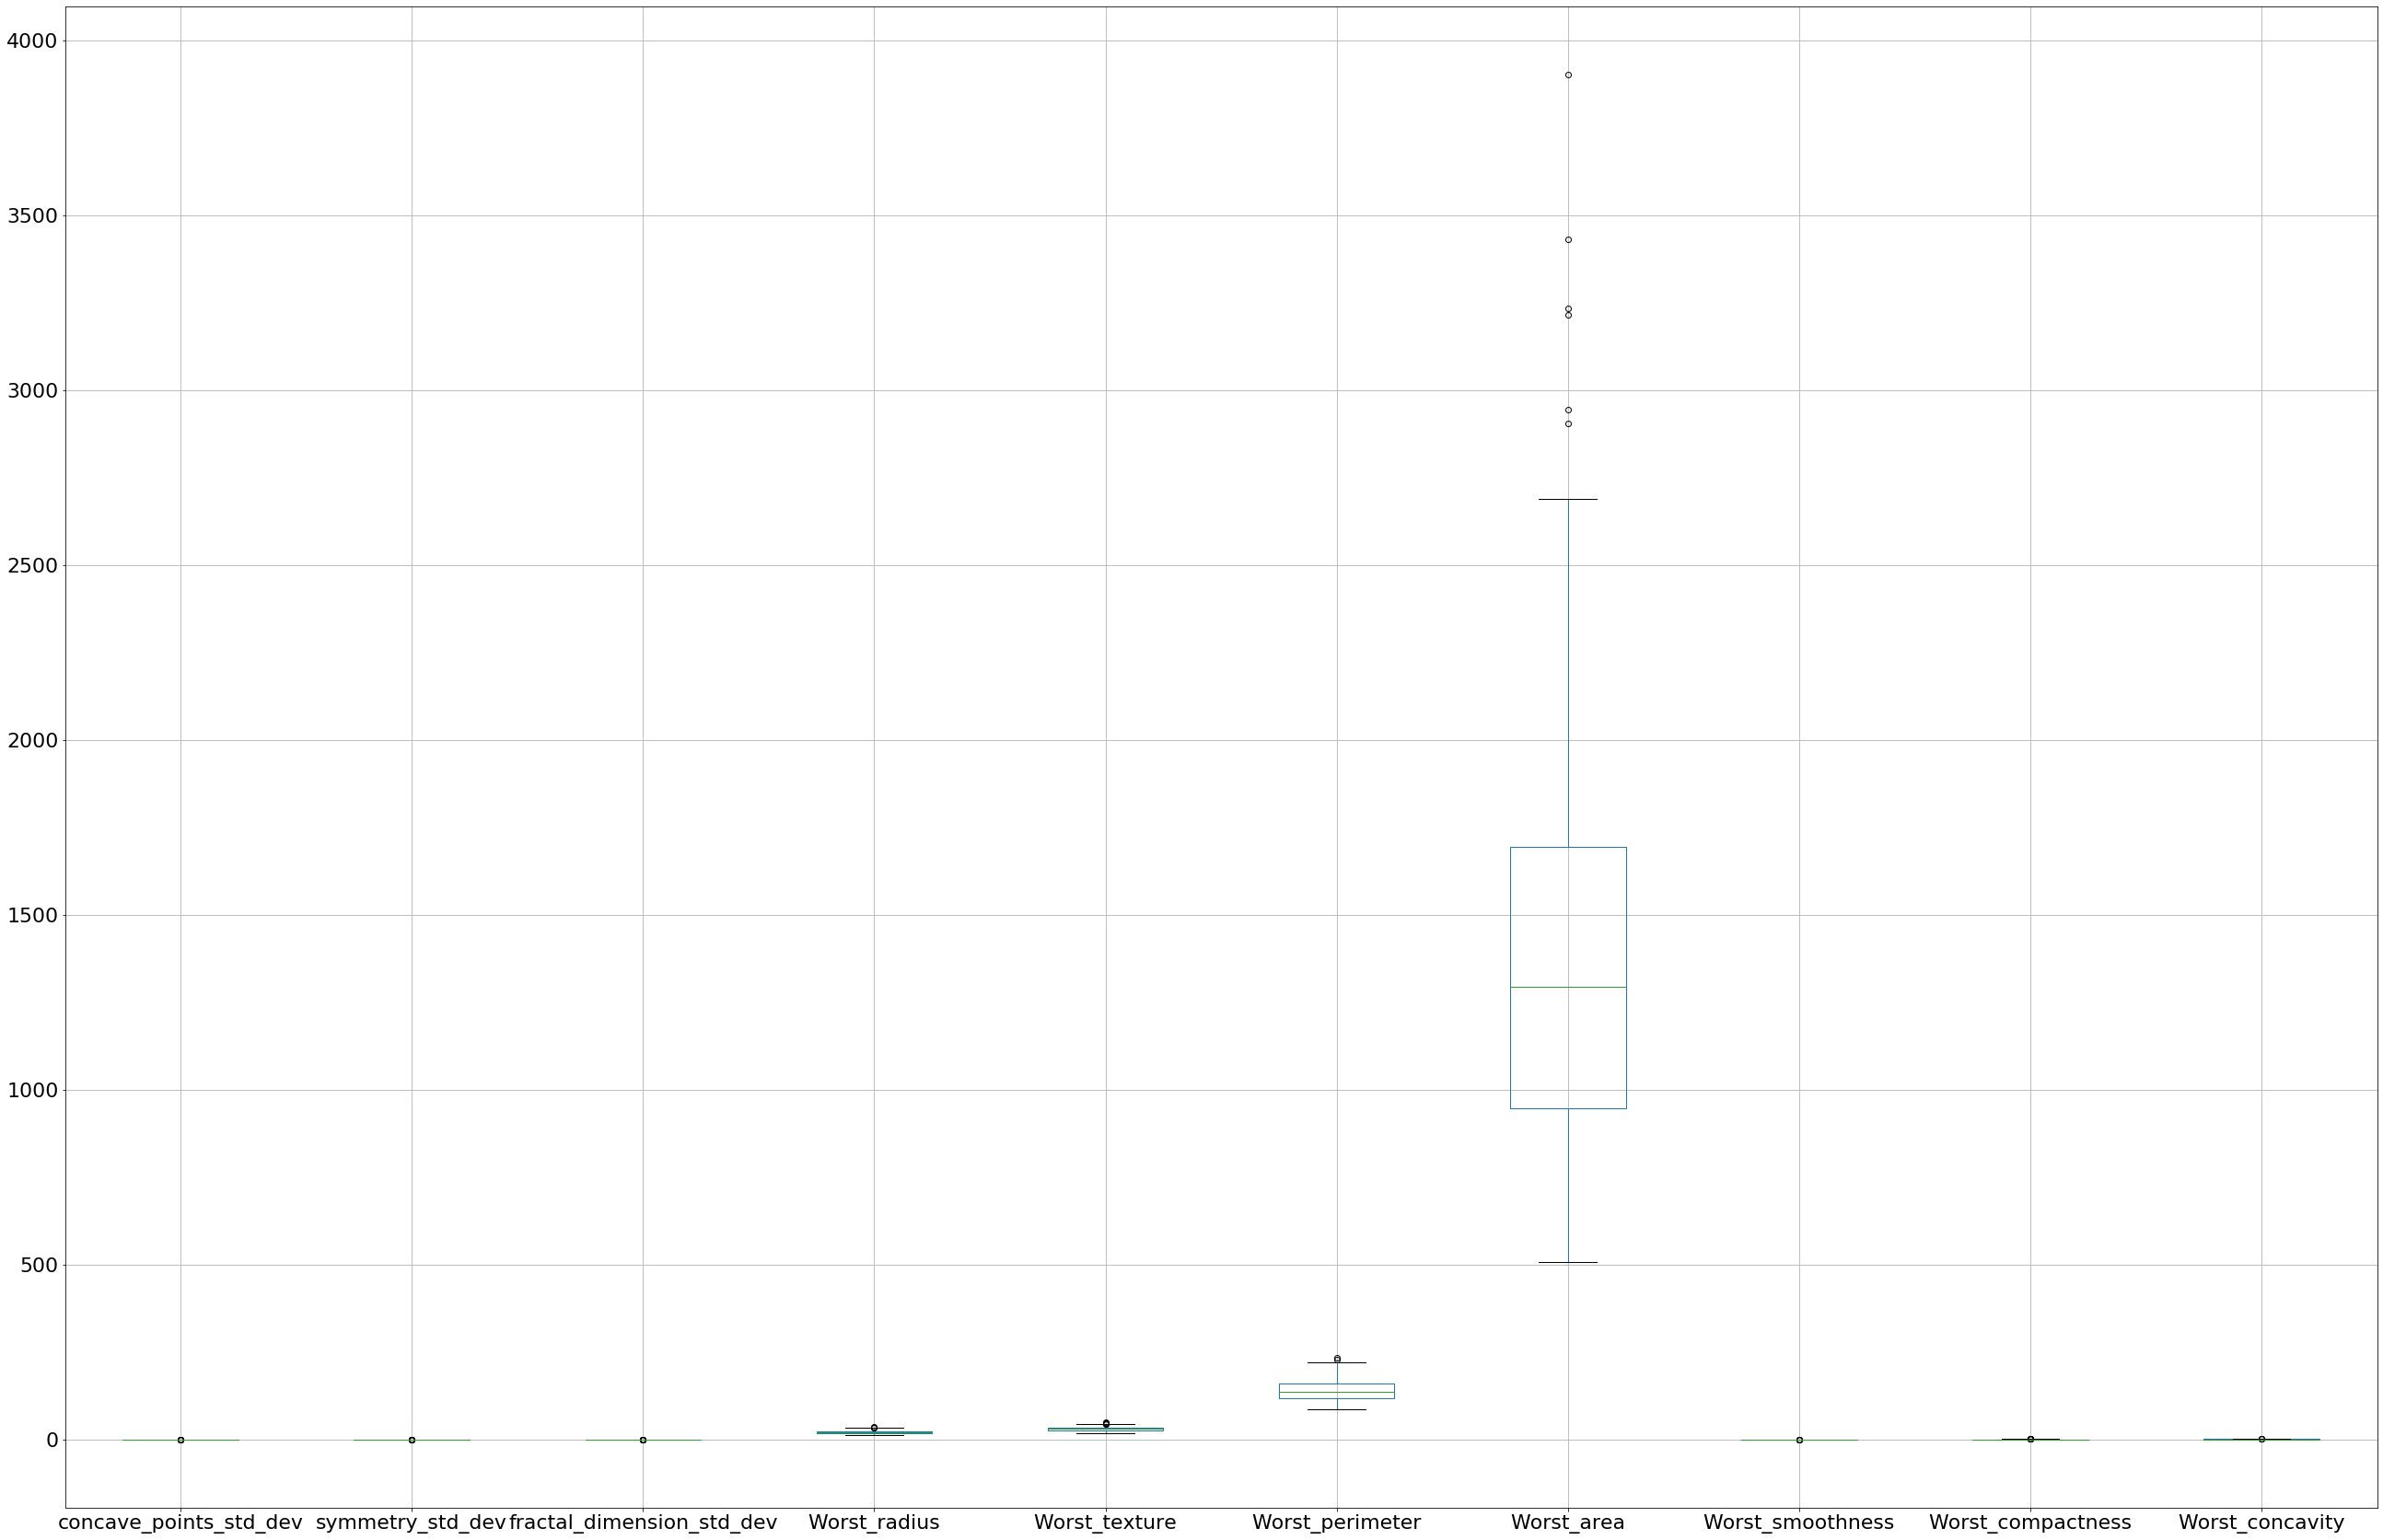

In [11]:
dataset.iloc[:, 20:30].boxplot(fontsize = 22, figsize=(45,30))

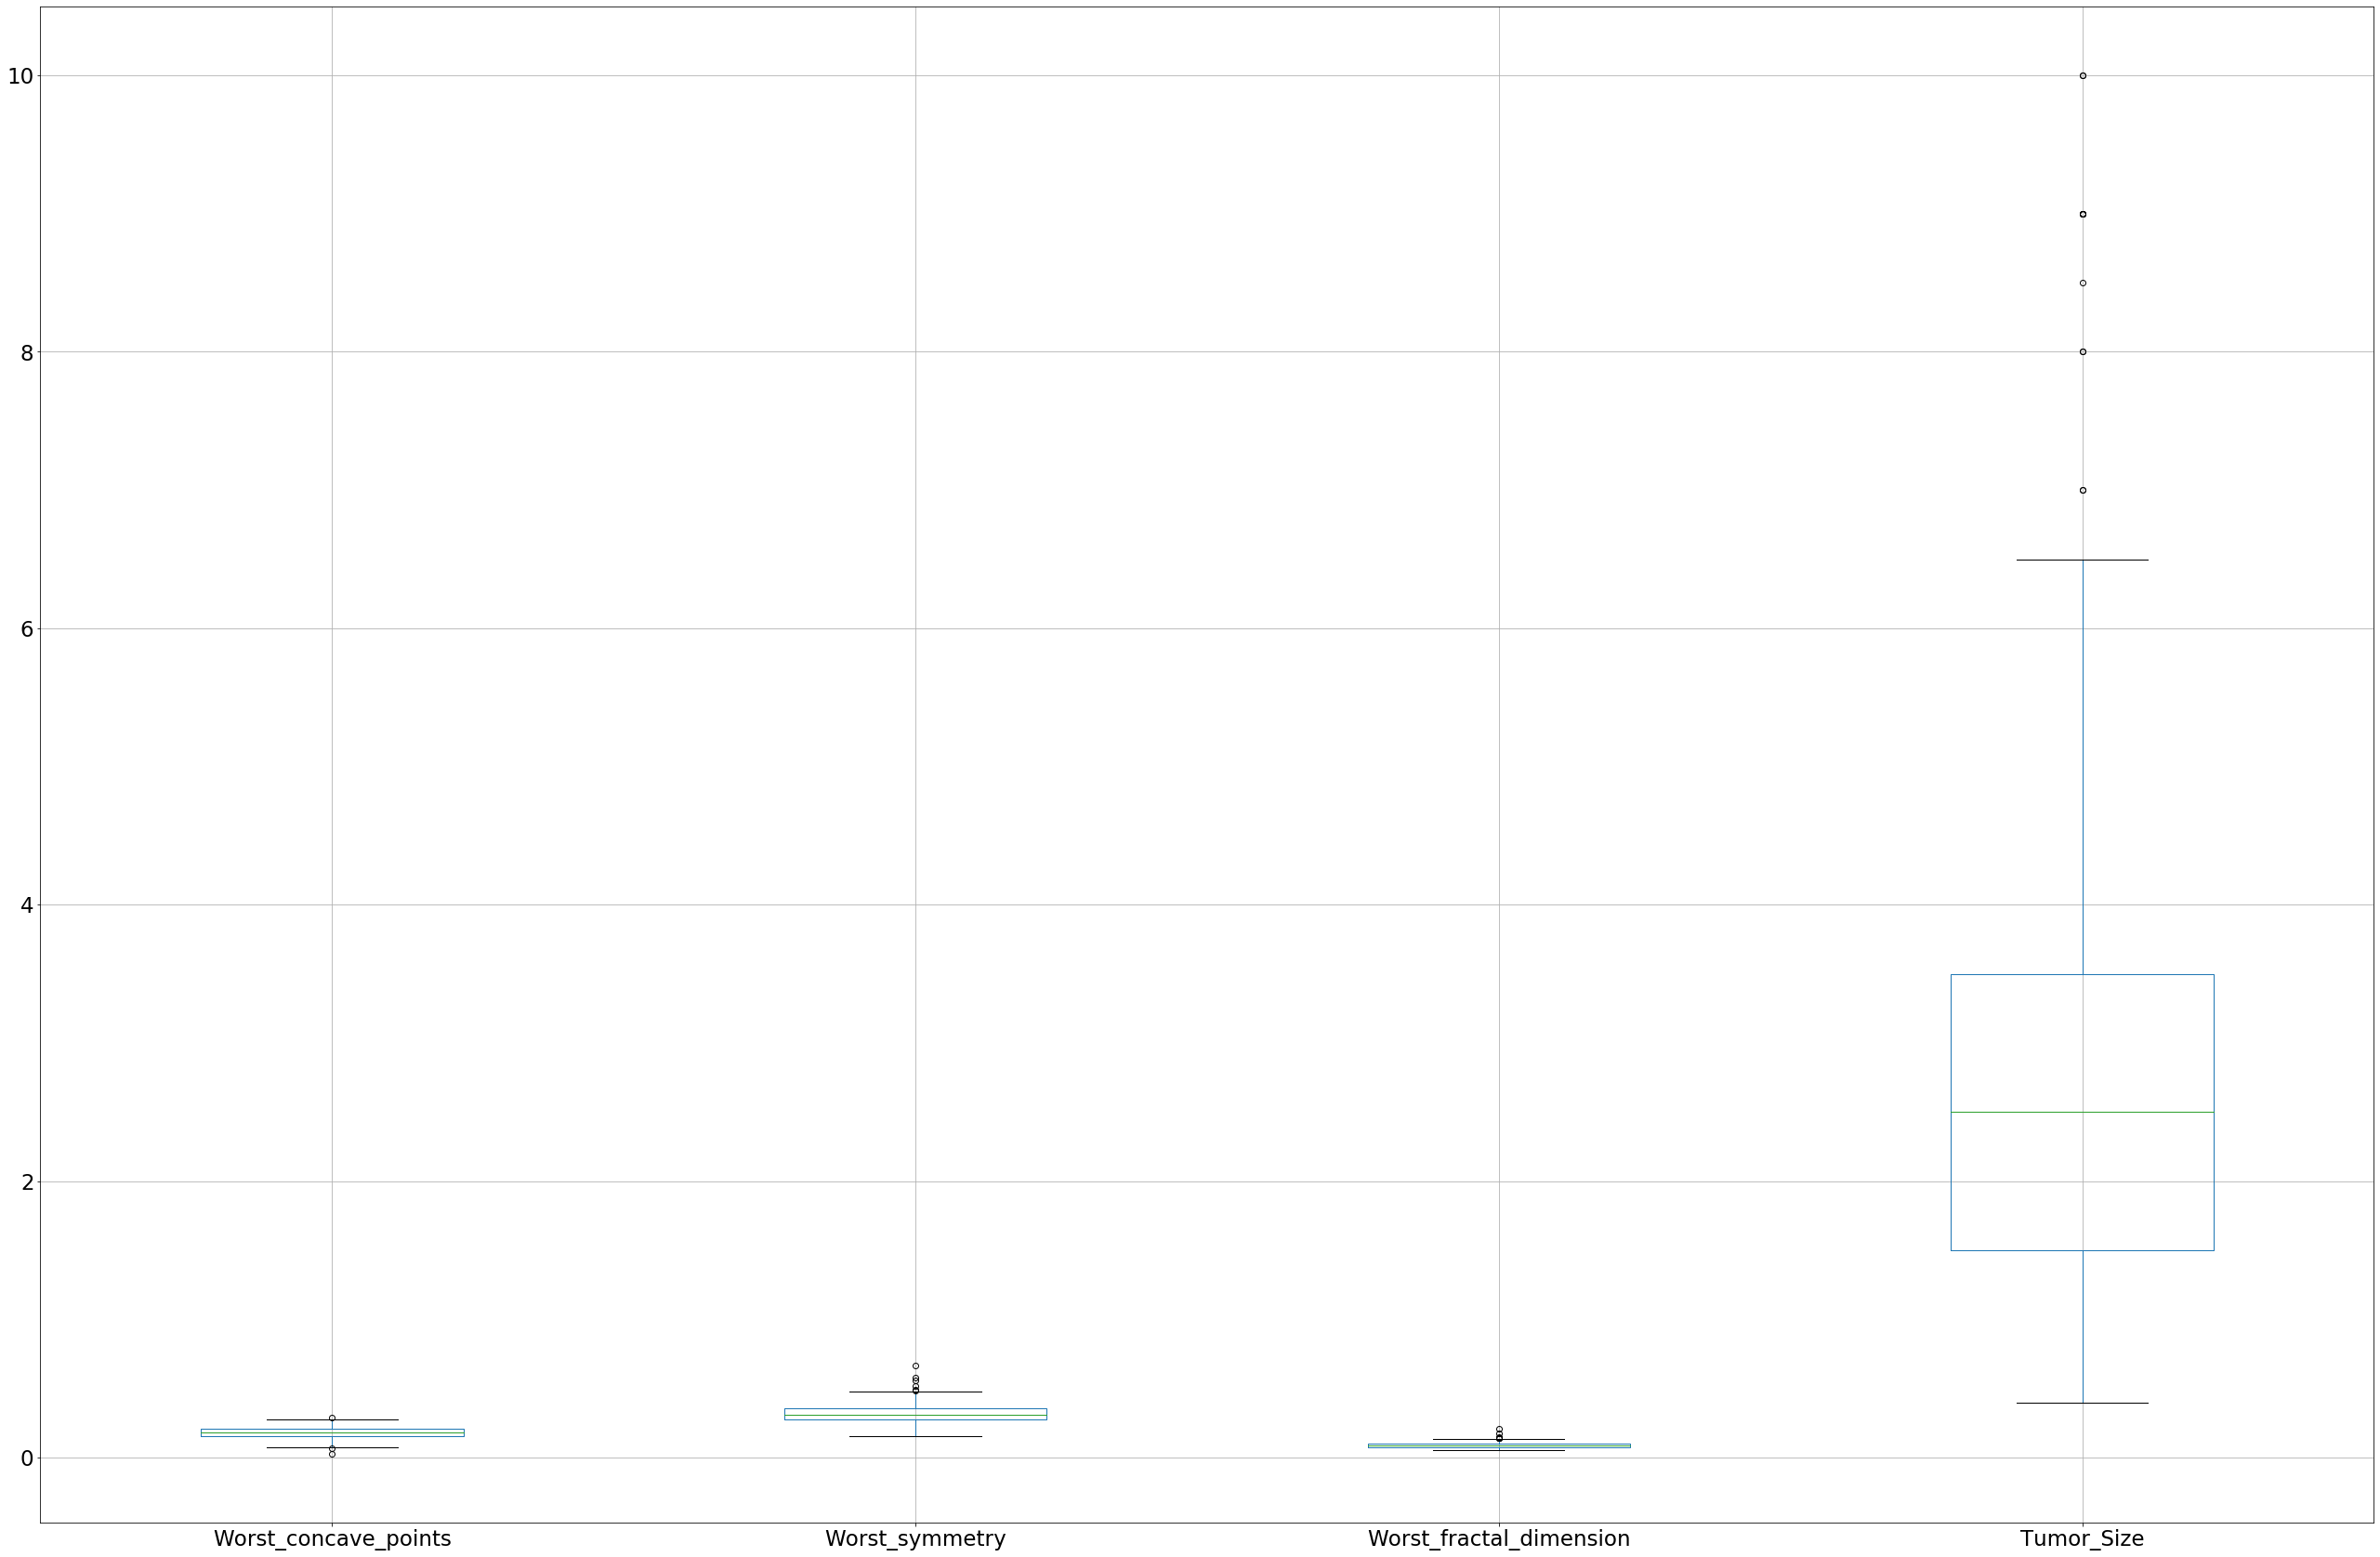

In [12]:
dataset.iloc[:, 30:].boxplot(fontsize = 23, figsize=(45,30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027E353C3208>,
      dtype=object)

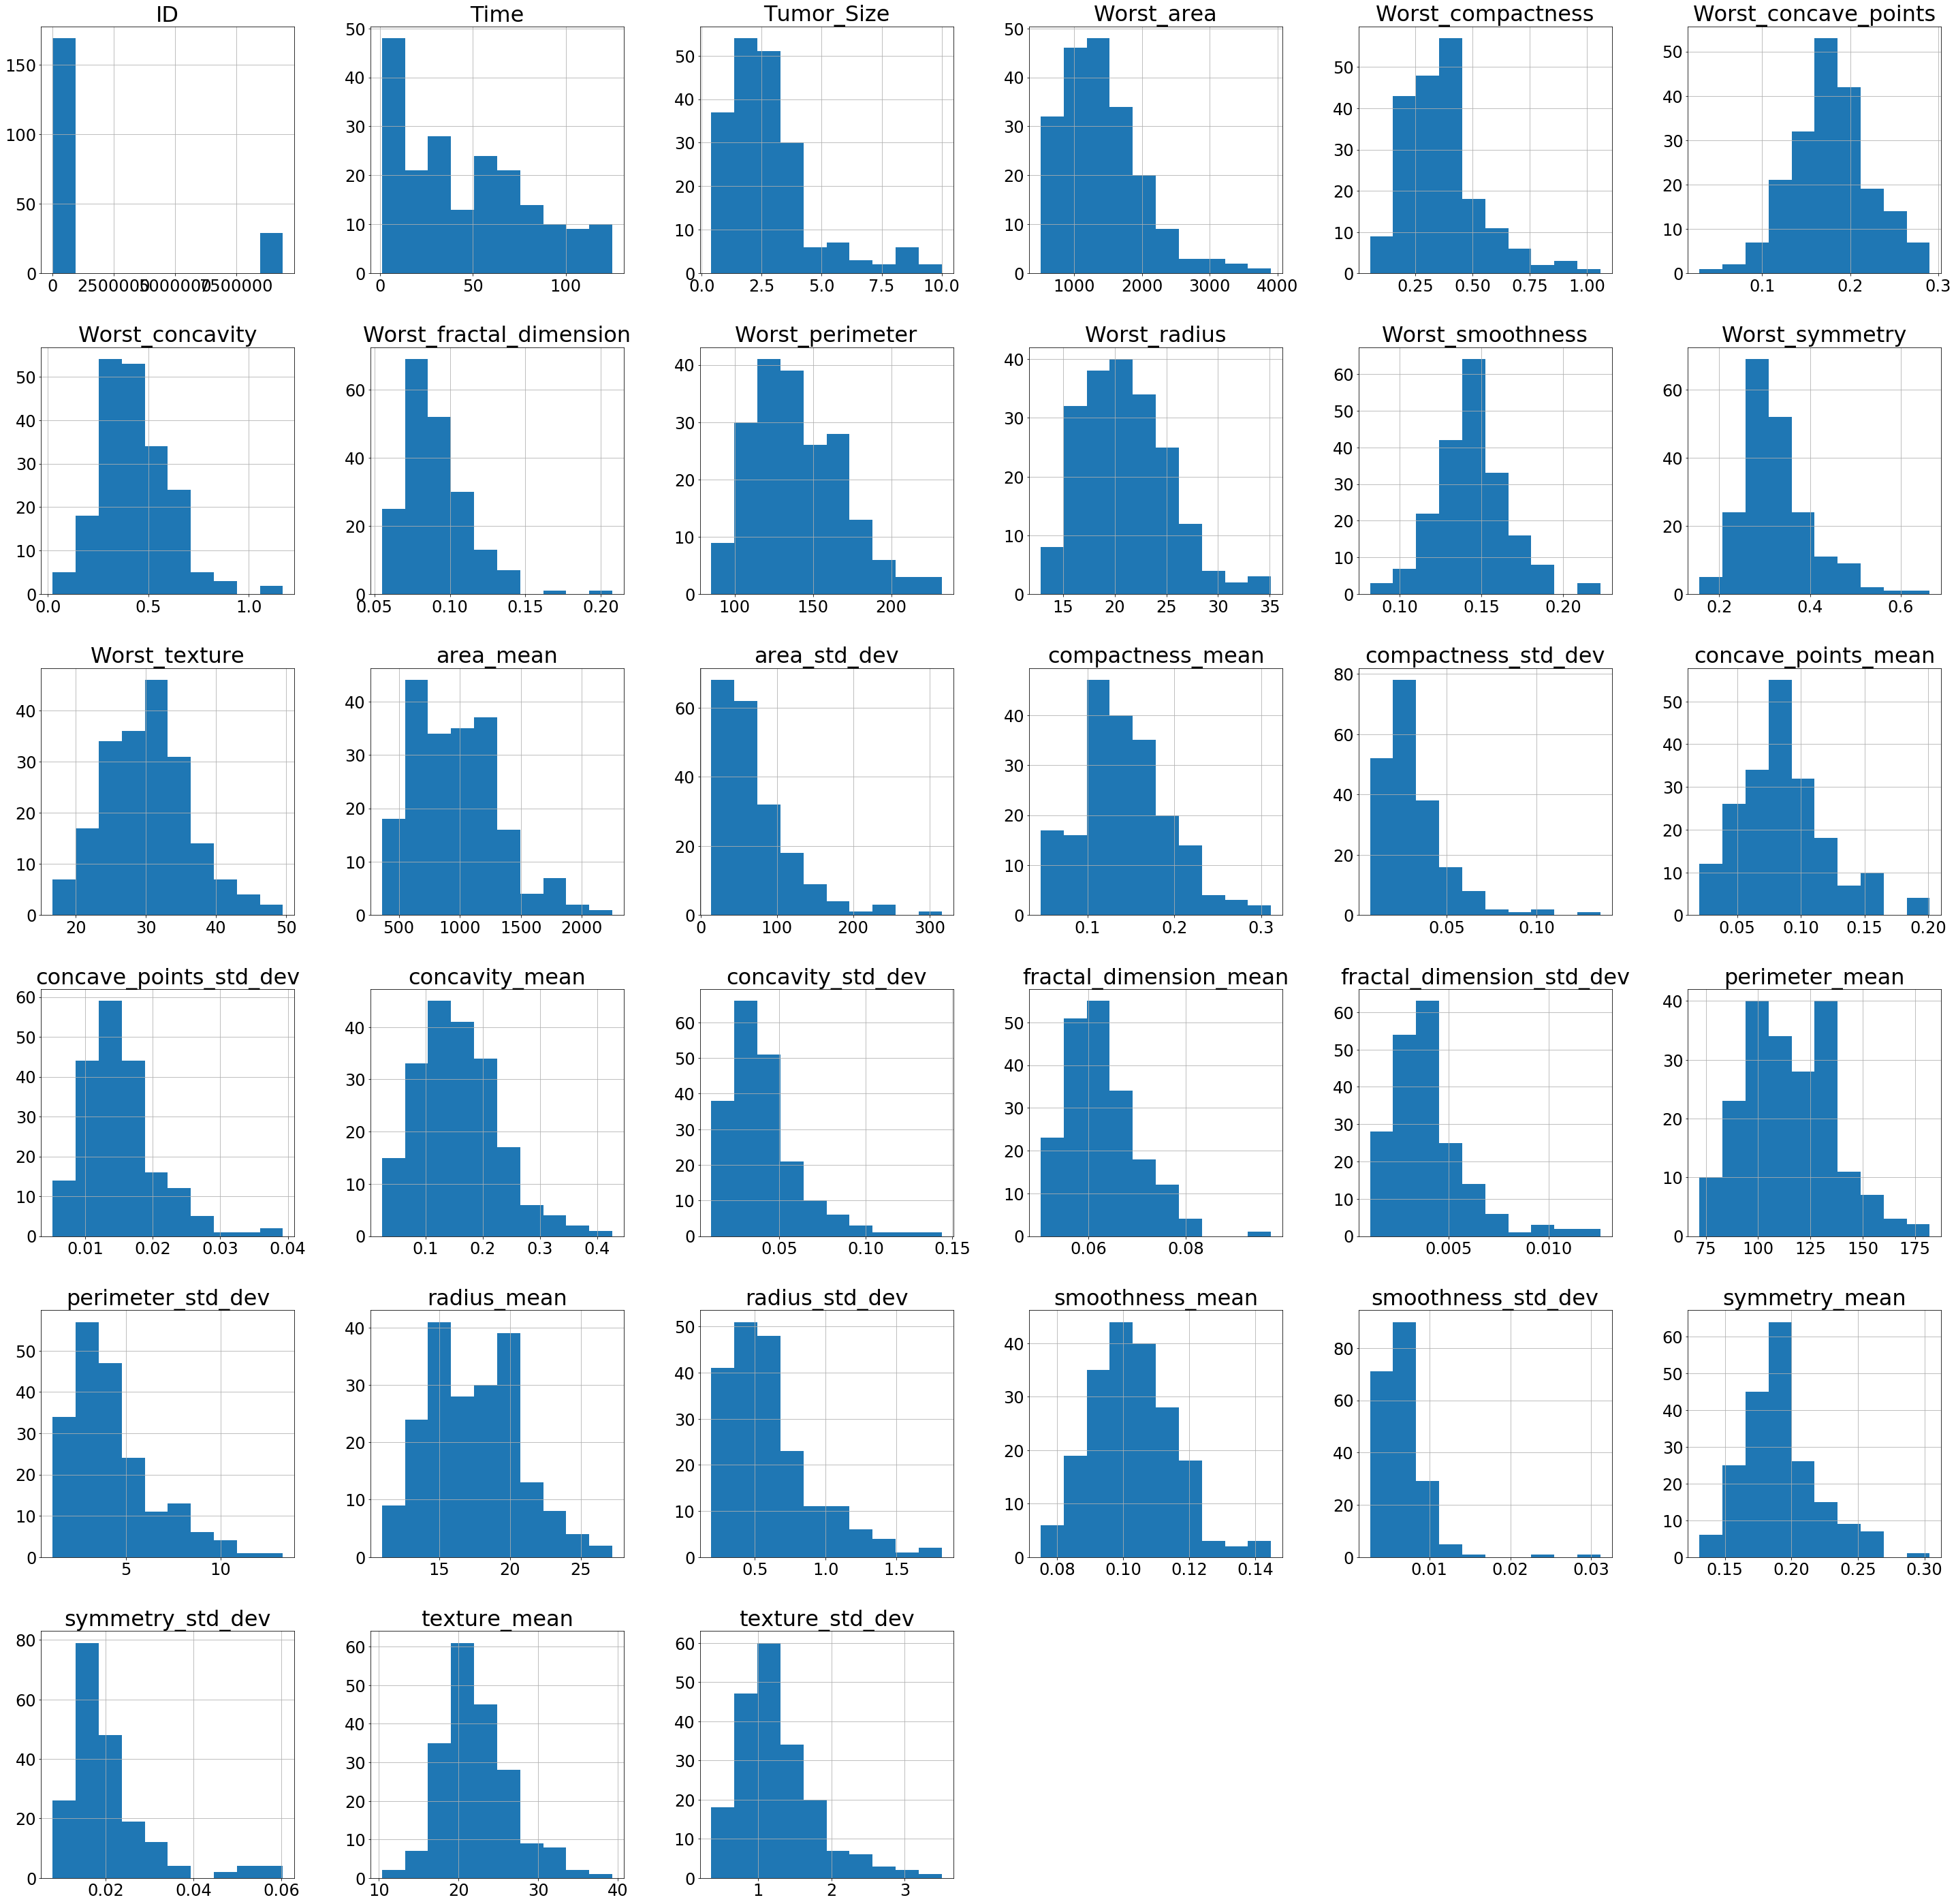

In [13]:
params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)
dataset.hist(figsize=(50,50))

(array([-0.2,  0. ,  0.2,  0.4]), <a list of 4 Text yticklabel objects>)

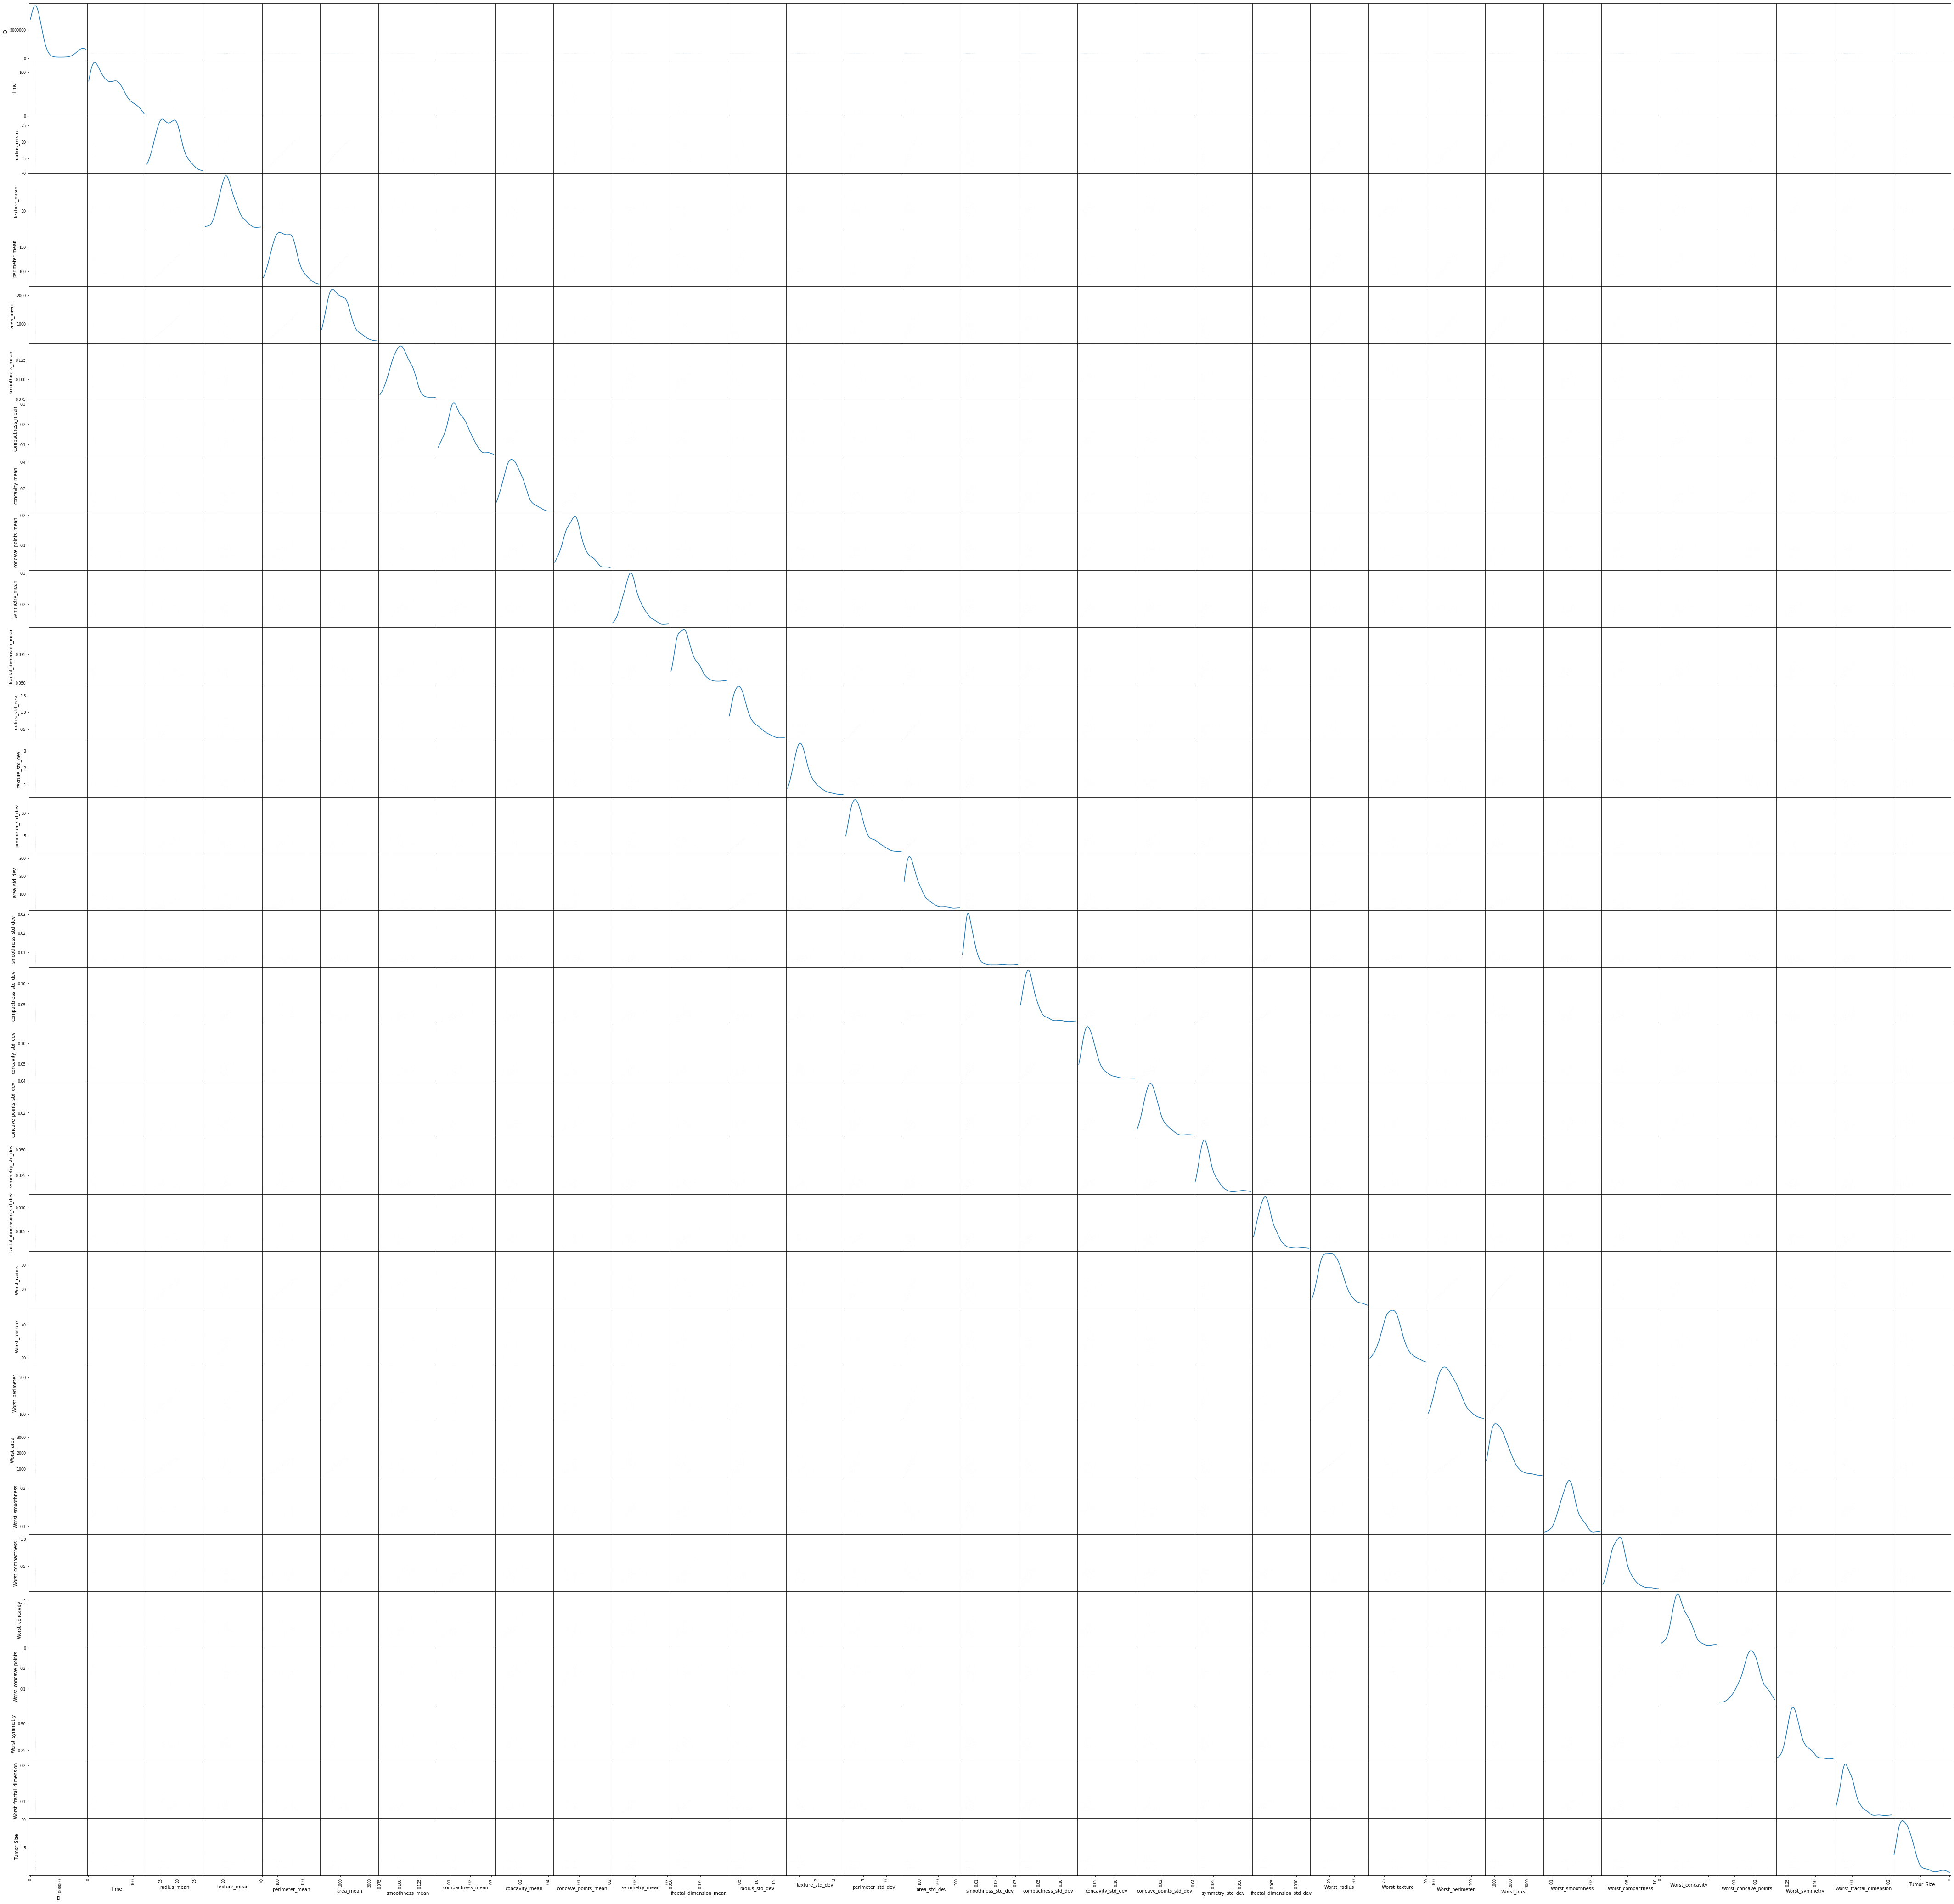

In [17]:
from pandas.plotting import scatter_matrix

scatter_matrix = scatter_matrix(
    dataset,
    figsize  = [75, 75],
    marker   = ".",
    s        = 0.2,
    diagonal = "kde"
)
scatter_matrix
plt.xticks(fontsize = 3)
plt.yticks(fontsize = 3)

### Manage missing and null values

In [18]:
dataset.isnull().sum()

ID                           0
Outcome                      0
Time                         0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave_points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_std_dev               0
texture_std_dev              0
perimeter_std_dev            0
area_std_dev                 0
smoothness_std_dev           0
compactness_std_dev          0
concavity_std_dev            0
concave_points_std_dev       0
symmetry_std_dev             0
fractal_dimension_std_dev    0
Worst_radius                 0
Worst_texture                0
Worst_perimeter              0
Worst_area                   0
Worst_smoothness             0
Worst_compactness            0
Worst_concavity              0
Worst_concave_points         0
Worst_symmetry               0
Worst_fr

In [19]:
dataset.isna().sum()

ID                           0
Outcome                      0
Time                         0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave_points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_std_dev               0
texture_std_dev              0
perimeter_std_dev            0
area_std_dev                 0
smoothness_std_dev           0
compactness_std_dev          0
concavity_std_dev            0
concave_points_std_dev       0
symmetry_std_dev             0
fractal_dimension_std_dev    0
Worst_radius                 0
Worst_texture                0
Worst_perimeter              0
Worst_area                   0
Worst_smoothness             0
Worst_compactness            0
Worst_concavity              0
Worst_concave_points         0
Worst_symmetry               0
Worst_fr

#### Remove 4 rows where '?' is present

In [21]:
dataset.replace('?', np.nan, inplace = True)
df = dataset.dropna()

In [22]:
print("Cancer data set dimensions : {}".format(df.shape))

Cancer data set dimensions : (194, 35)


#### Co-relation matrix

In [60]:
dataset.corr()

ID      Time  radius_mean  texture_mean  \
ID                         1.000000 -0.135299     0.087392      0.037650   
Time                      -0.135299  1.000000    -0.344722     -0.264671   
radius_mean                0.087392 -0.344722     1.000000      0.143456   
texture_mean               0.037650 -0.264671     0.143456      1.000000   
perimeter_mean             0.088027 -0.346080     0.995933      0.142033   
area_mean                  0.070117 -0.344031     0.992855      0.140440   
smoothness_mean           -0.039803  0.164793    -0.158239     -0.192262   
compactness_mean           0.059505  0.010000     0.159017     -0.039803   
concavity_mean             0.051946 -0.139475     0.469518      0.037165   
concave_points_mean        0.074368 -0.171841     0.664010      0.006687   
symmetry_mean             -0.043264  0.177311    -0.051610     -0.165166   
fractal_dimension_mean     0.024509  0.269992    -0.416674     -0.145572   
radius_std_dev             0.012313 -0.214543     0.602035      0.059168   
texture_std_dev            0.037530 -0.230477     0.079693      0.382533   
perimeter_std_dev          0.027710 -0.231621     0.588927      0.075025   
area_std_dev               0.004872 -0.244159     0.710586      0.068517   
smoothness_std_dev         0.124037  0.019775    -0.036419      0.027119   
compactness_std_dev        0.100940 -0.002386     0.023647      0.063988   
concavity_std_dev          0.119171 -0.108648     0.154254      0.071920   
concave_points_std_dev     0.158519 -0.140754     0.224771      0.010470   
symmetry_std_dev           0.100087  0.011156     0.019146     -0.094843   
fractal_dimension_std_dev  0.152869  0.099203    -0.072618     -0.020673   
Worst_radius               0.031900 -0.265115     0.924183      0.123028   
Worst_texture              0.007285 -0.171125    -0.039439      0.862050   
Worst_perimeter            0.043099 -0.280596     0.915053      0.123674   
Worst_area                 0.008451 -0.253930     0.891489      0.117467   
Worst_smoothness          -0.057241  0.212769    -0.372894     -0.113308   
Worst_compactness          0.005048  0.120516    -0.150712     -0.006467   
Worst_concavity            0.043288  0.009546     0.038952      0.013635   
Worst_concave_points       0.059702 -0.026541     0.357869     -0.069921   
Worst_symmetry            -0.053920  0.247678    -0.232142     -0.186850   
Worst_fractal_dimension    0.003154  0.288715    -0.414340     -0.085847   
Tumor_Size                -0.132809 -0.133355     0.172102      0.027073   

                           perimeter_mean  area_mean  smoothness_mean  \
ID                               0.088027   0.070117        -0.039803   
Time                            -0.346080  -0.344031         0.164793   
radius_mean                      0.995933   0.992855        -0.158239   
texture_mean                     0.142033   0.140440        -0.192262   
perimeter_mean                   1.000000   0.990699        -0.102912   
area_mean                        0.990699   1.000000        -0.141470   
smoothness_mean                 -0.102912  -0.141470         1.000000   
compactness_mean                 0.236721   0.163176         0.666559   
concavity_mean                   0.533194   0.475862         0.623867   
concave_points_mean              0.712766   0.667530         0.545734   
symmetry_mean                   -0.006512  -0.060785         0.540761   
fractal_dimension_mean          -0.353560  -0.397733         0.744890   
radius_std_dev                   0.612708   0.623019         0.094728   
texture_std_dev                  0.092256   0.084288         0.153848   
perimeter_std_dev                0.609964   0.609887         0.099518   
area_std_dev                     0.718581   0.740830         0.037955   
smoothness_std_dev              -0.011788  -0.032969         0.344678   
compactness_std_dev              0.080725   0.020395         0.372393   
concavity_std_dev                0.202027   0.144443         

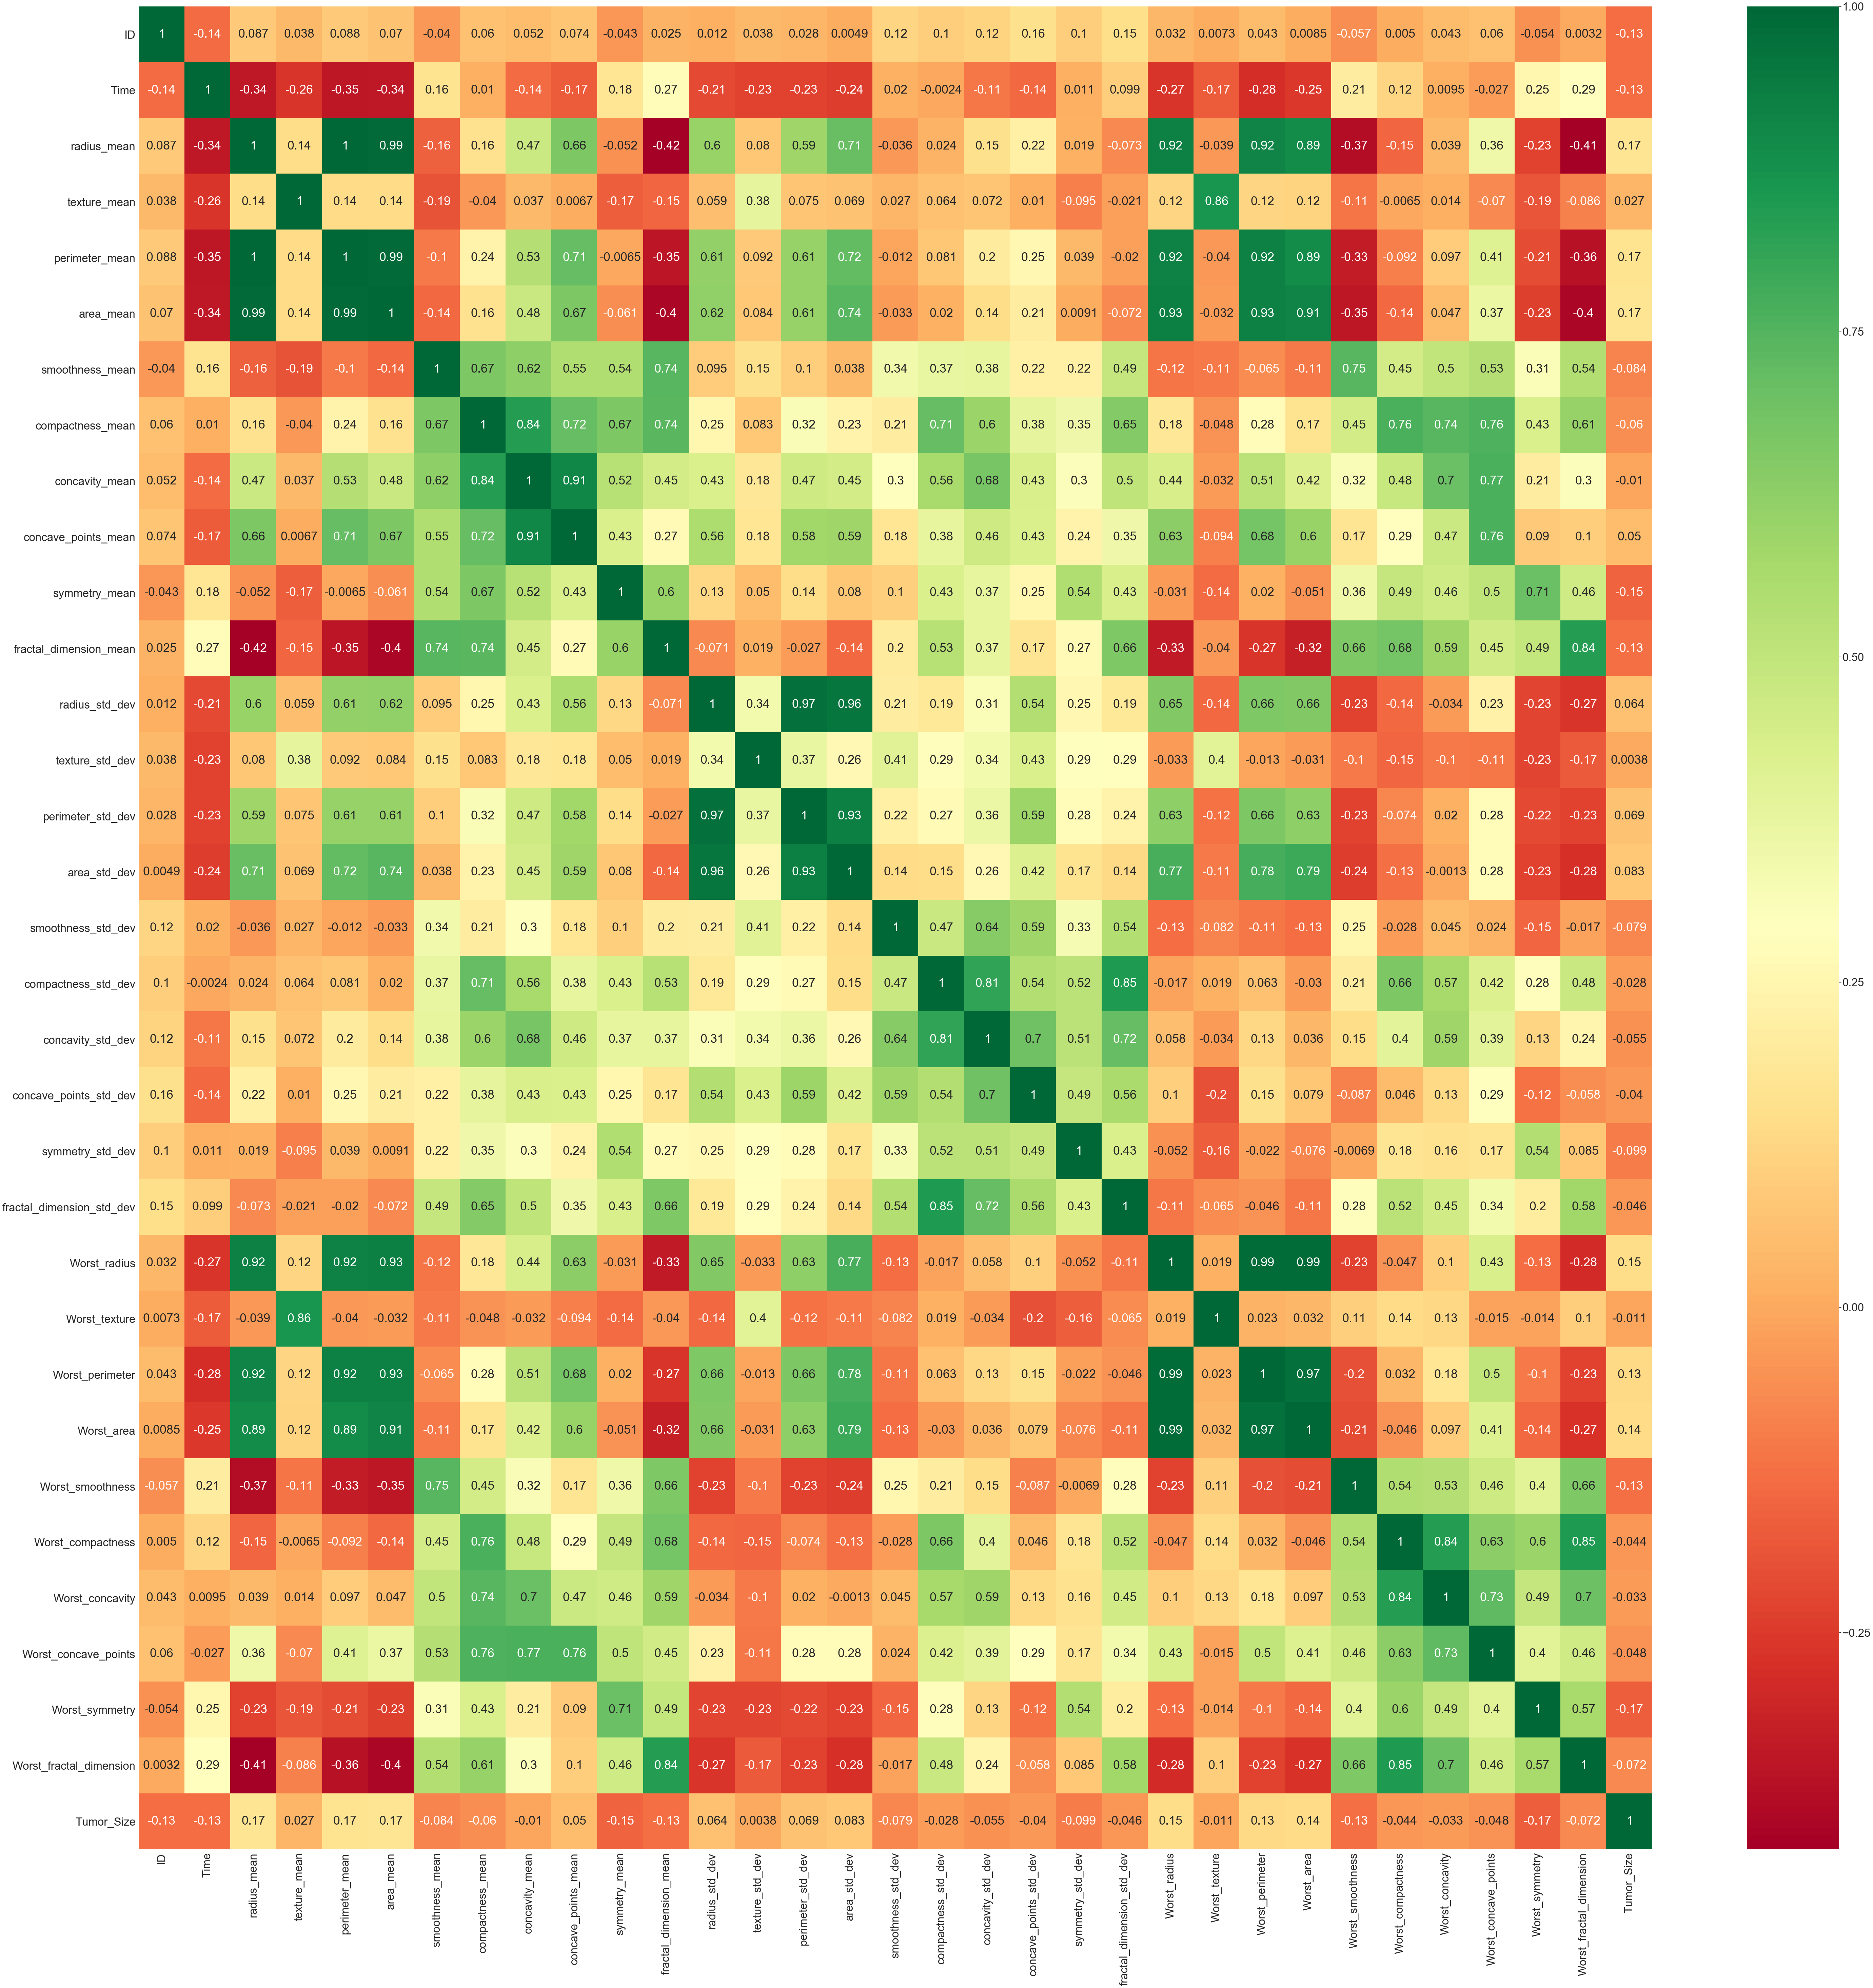

In [64]:
import seaborn as sns

sns.set(font_scale=3)
corrmat = dataset.corr()
top_corr_features = corrmat.index
fig, ax = plt.subplots(figsize=(100,100))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(method='pearson'),annot=True,cmap="RdYlGn")

## Dataset splitting

### Split data into feature dataframe(X) and prediction class dataframe(Y)

In [24]:
X = df.iloc[:, 2:31].values
Y = df.iloc[:, 1].values

X,Y

(array([[3.100e+01, 1.802e+01, 2.760e+01, ..., 1.926e-01, 3.140e-01,
         1.170e-01],
        [6.100e+01, 1.799e+01, 1.038e+01, ..., 6.656e-01, 7.119e-01,
         2.654e-01],
        [1.160e+02, 2.137e+01, 1.744e+01, ..., 3.449e-01, 3.414e-01,
         2.032e-01],
        ...,
        [8.000e+00, 1.544e+01, 3.118e+01, ..., 2.362e-01, 2.975e-01,
         1.286e-01],
        [1.200e+01, 1.717e+01, 2.919e+01, ..., 1.572e-01, 2.141e-01,
         9.520e-02],
        [6.000e+00, 1.670e+01, 2.813e+01, ..., 2.808e-01, 3.455e-01,
         1.317e-01]]),
 array(['N', 'N', 'N', 'N', 'R', 'R', 'R', 'N', 'N', 'N', 'N', 'N', 'R',
        'N', 'R', 'N', 'R', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
        'N', 'N', 'N', 'N', 'N', 'N', 'R', 'N', 'N', 'R', 'N', 'R', 'R',
        'N', 'R', 'R', 'N', 'N', 'R', 'N', 'R', 'N', 'R', 'N', 'N', 'N',
        'N', 'N', 'R', 'N', 'N', 'R', 'N', 'N', 'R', 'N', 'N', 'N', 'N',
        'R', 'N', 'R', 'N', 'N', 'N', 'N', 'N', 'R', 'N', 'N', 'N', 'N',
       

### Label Categorical Data

In [25]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [28]:
X,Y, len(X), len(Y)

(array([[3.100e+01, 1.802e+01, 2.760e+01, ..., 1.926e-01, 3.140e-01,
         1.170e-01],
        [6.100e+01, 1.799e+01, 1.038e+01, ..., 6.656e-01, 7.119e-01,
         2.654e-01],
        [1.160e+02, 2.137e+01, 1.744e+01, ..., 3.449e-01, 3.414e-01,
         2.032e-01],
        ...,
        [8.000e+00, 1.544e+01, 3.118e+01, ..., 2.362e-01, 2.975e-01,
         1.286e-01],
        [1.200e+01, 1.717e+01, 2.919e+01, ..., 1.572e-01, 2.141e-01,
         9.520e-02],
        [6.000e+00, 1.670e+01, 2.813e+01, ..., 2.808e-01, 3.455e-01,
         1.317e-01]]),
 array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
 

### Splitting the dataset into training and test dataset (75:25)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [32]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(145, 49, 145, 49)

In [33]:
X_train, X_test, Y_train, Y_test

(array([[ 8.    , 15.44  , 31.18  , ...,  0.2362,  0.2975,  0.1286],
        [87.    , 17.02  , 23.98  , ...,  0.3559,  0.5588,  0.1847],
        [34.    , 13.44  , 21.58  , ...,  0.2043,  0.2085,  0.1112],
        ...,
        [58.    , 19.53  , 18.9   , ...,  0.4116,  0.6121,  0.198 ],
        [91.    , 15.06  , 19.83  , ...,  0.4203,  0.5203,  0.2115],
        [29.    , 21.93  , 30.64  , ...,  0.4072,  0.4494,  0.1886]]),
 array([[55.    , 19.16  , 26.6   , ...,  0.3841,  0.5754,  0.1872],
        [10.    , 22.41  , 29.95  , ...,  0.3832,  0.5842,  0.2422],
        [14.    , 24.25  , 20.2   , ...,  0.4244,  0.5803,  0.2248],
        ...,
        [77.    , 12.83  , 22.33  , ...,  0.5343,  0.6282,  0.1977],
        [ 7.    , 20.29  , 21.49  , ...,  0.3449,  0.4509,  0.1943],
        [13.    , 17.27  , 25.42  , ...,  0.4122,  0.5036,  0.1739]]),
 array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 

## Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train, X_test

(array([[-1.12429156, -0.62203103,  1.97096577, ..., -0.8392295 ,
         -0.82656866, -1.14369261],
        [ 1.16771054, -0.11550047,  0.33486735, ..., -0.10634869,
          0.66835604,  0.08254188],
        [-0.36996175, -1.26320896, -0.21049879, ..., -1.03454193,
         -1.33574699, -1.52402202],
        ...,
        [ 0.32634268,  0.68917783, -0.81949099, ...,  0.23468274,
          0.97329093,  0.37325345],
        [ 1.28376128, -0.74385484, -0.60816161, ...,  0.28794977,
          0.44809351,  0.66833661],
        [-0.51502518,  1.45859135,  1.84825839, ...,  0.20774309,
          0.04246717,  0.16778813]]),
 array([[ 0.23930463,  0.57055992,  0.93022539, ...,  0.06630995,
          0.76332638,  0.13718691],
        [-1.06626619,  1.61247405,  1.69146563, ...,  0.06079957,
          0.81367211,  1.33937759],
        [-0.95021545,  2.20235775, -0.52408433, ...,  0.31305262,
          0.7913598 ,  0.95904818],
        ...,
        [ 0.87758369, -1.45876823, -0.04007187, ...,  

## Model selection

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
cm

C:\Users\shiven.purohit\AppData\Local\Continuum\anaconda3\envs\TAAC_SPT6\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[36,  2],
       [10,  1]], dtype=int64)

In [46]:
accuracy = (cm[0][0]+cm[1][1])/sum(sum(cm))
precision = cm[0][0]/sum(cm)[0]
recall = cm[0][0]/(cm[0][0]+cm[0][1])
accuracy, precision, recall

(0.7551020408163265, 0.782608695652174, 0.9473684210526315)

### KNeighborsClassifier Method

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
cm

array([[36,  2],
       [11,  0]], dtype=int64)

In [48]:
accuracy = (cm[0][0]+cm[1][1])/sum(sum(cm))
precision = cm[0][0]/sum(cm)[0]
recall = cm[0][0]/(cm[0][0]+cm[0][1])
accuracy, precision, recall

(0.7346938775510204, 0.7659574468085106, 0.9473684210526315)

### Support Vector Machine Algorithm

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
cm

array([[36,  2],
       [10,  1]], dtype=int64)

In [51]:
accuracy = (cm[0][0]+cm[1][1])/sum(sum(cm))
precision = cm[0][0]/sum(cm)[0]
recall = cm[0][0]/(cm[0][0]+cm[0][1])
accuracy, precision, recall

(0.7551020408163265, 0.782608695652174, 0.9473684210526315)

### Kernel SVM Algorithm

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
cm

array([[37,  1],
       [10,  1]], dtype=int64)

In [53]:
accuracy = (cm[0][0]+cm[1][1])/sum(sum(cm))
precision = cm[0][0]/sum(cm)[0]
recall = cm[0][0]/(cm[0][0]+cm[0][1])
accuracy, precision, recall

(0.7755102040816326, 0.7872340425531915, 0.9736842105263158)

### GaussianNB method of naïve_bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
cm

array([[29,  9],
       [ 8,  3]], dtype=int64)

In [55]:
accuracy = (cm[0][0]+cm[1][1])/sum(sum(cm))
precision = cm[0][0]/sum(cm)[0]
recall = cm[0][0]/(cm[0][0]+cm[0][1])
accuracy, precision, recall

(0.6530612244897959, 0.7837837837837838, 0.7631578947368421)

### Decision Tree Algorithm

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)


cm = confusion_matrix(Y_test, Y_pred)
cm

array([[30,  8],
       [ 8,  3]], dtype=int64)

In [57]:
accuracy = (cm[0][0]+cm[1][1])/sum(sum(cm))
precision = cm[0][0]/sum(cm)[0]
recall = cm[0][0]/(cm[0][0]+cm[0][1])
accuracy, precision, recall

(0.673469387755102, 0.7894736842105263, 0.7894736842105263)

### Random Forest Classification algorithm

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
cm

array([[37,  1],
       [10,  1]], dtype=int64)

In [59]:
accuracy = (cm[0][0]+cm[1][1])/sum(sum(cm))
precision = cm[0][0]/sum(cm)[0]
recall = cm[0][0]/(cm[0][0]+cm[0][1])
accuracy, precision, recall

(0.7755102040816326, 0.7872340425531915, 0.9736842105263158)